[View in Colaboratory](https://colab.research.google.com/github/janchorowski/nn_assignments/blob/nn18/assignment1/Assignment1.ipynb)

# Assignment 1


## Important notes

**Submission deadline:**
* **Problems 1-4: last lab session before or on Friday, 19.10.18**
* **Problems 5-6: last lab session before or on Friday, 26.10.18**

**Points: 10 + 4 bonus points**

Please note: some of the assignments are tedious or boring if you are already a NumPy ninja. The bonus problems were designed to give you a more satisfying alternative.

The assignment is in the form of a Jupyter notebook. We will be using [Google Colab](https://colab.research.google.com) to solve it. Below you will find a "Setup" section. Follow instructions from this paragraph to download the notebook and open it using [Google Colab](https://colab.research.google.com). 

Your goal is to solve problems posted below. Whenever possible, add your solutions to the notebook.

Please email us about any problems with it - we will try to correct them quickly. Also, please do not hesitate to use GitHub’s pull requests to send us corrections!

## Setup

### 1. Open the notebook using Google Colab

1. From Github: Click on "View in Colaboratory", then save to your Google Drive.
2. Alternatively upload manually to Drive:
  1. Download the notebook or clone https://github.com/janchorowski/nn_assignments.
  2. Go to  [Google Colab](https://colab.research.google.com).
  3. Go to "UPLOAD" tab and select a local copy of the notebook that you downloaded in point 1.
  
Colab Tips:
1. Set tab width to 4 spaces under `Tools -> Prferences`.
  
### 2. Open the notebook offline using Jupyter/IPython

This notebook can be opened using Jupyter notebook. Simply install a scientific Python distribution on your computer (e.g. [Anaconda](https://www.anaconda.com/) or [WinPython](http://winpython.github.io/)), clone the repository https://github.com/janchorowski/nn_assignments and run `jupyter notebook`.

###   3. Install required dependencies, download data and import packages

Run cells below. To run a cell either click it and click a run button or press "shift + enter"


In [0]:
# Please note that this code needs only to be run in a fresh runtime.
# However, it can be rerun afterwards too.
!pip install -q gdown httpimport
![ -e cifar.npz ] || gdown 'https://drive.google.com/uc?id=1oBzZdtg2zNTPGhbRy6DQ_wrf5L5OAhNR' -O cifar.npz
![ -e mnist.npz ] || gdown 'https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU' -O mnist.npz

Downloading...
From: https://drive.google.com/uc?id=1oBzZdtg2zNTPGhbRy6DQ_wrf5L5OAhNR
To: /content/cifar.npz
185MB [00:01, 155MB/s]
Downloading...
From: https://drive.google.com/uc?id=1QPaC3IKB_5tX6yIZgRgkpcqFrfVqPTXU
To: /content/mnist.npz
55.4MB [00:00, 152MB/s] 


In [0]:
# Standard IPython notebook imports
%matplotlib inline

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os

import httpimport
import matplotlib.pyplot as plt
import numpy as np
import time

import seaborn as sns
from sklearn import datasets

# In this way we can import functions straight from github
with httpimport.github_repo('janchorowski', 'nn_assignments', 
                            module='common', branch='nn18'):
     from common.plotting import plot_mat

sns.set_style('whitegrid')

### 4. Follow the notebook and solve problems posted below

## Problems

### Problem 0 [0p]

 
1. To learn more about Jupyter,  read [Jupyter tutorial from Data Analysis in Biological Sciences course at Caltech](http://bebi103.caltech.edu/2015/tutorials/t0b_intro_to_jupyter_notebooks.html) (which itself can be downloaded as a Jupyter notebook). Feel free to skip the tutorial if you have some prior experience with Jupyter notebook.
2. To learn more about basic Google Colab features, go to [Google Colab](https://colab.research.google.com) and select "Overview of Colaboratory Features" in "EXAMPLES" tab. To learn more about / set up useful keyboard shortcuts (e.g. to add a new cell without clicking ""+ code"), go to "Tools --> Keyboard shortcuts"

### Problem 1 [2p]

First, get familiar with Python at https://docs.python.org/2/tutorial/. Then, get
to know the capabilities of NumPy, the prime numerical library of Python http://www.numpy.org/, for instance with the tutorial at http://wiki.scipy.org/Tentative_NumPy_Tutorial.

You might also need:
  1. another intro to NumPy,
http://people.duke.edu/~ccc14/pcfb/numerics.html
  2. a better interactive shell for Python,
http://ipython.org/
  3. access to IPython through an ordinary web browser,
http://ipython.org/notebook.html
  4. a plotting library for Python.
http://matplotlib.org/

**a) Declare variables:**
1. $a=10$,
2. $b=2.5\times 10^{23}$,
3. $c=2+3i$, where $i$ is an imaginary unit,
4. $d=e^{i2\pi/3}$, where $i$ is an imaginary unit, $e$ is the Euler's number (use `exp`, `pi`).

In [0]:
# TODO: Complete the declarations
a = 10
b = 2.5 * 10**23
c = 2 + 3j
d = np.exp(1j * 2 * np.pi / 3)

**b) Declare vectors:**
1. $aVec=\begin{bmatrix} 3.14 & 15 & 9 & 26 \end{bmatrix}$,
2. $bVec=\begin{bmatrix} 2.71 & 8 & 28 & 182 \end{bmatrix}^\intercal$ (column vector),
3. $cVec=\begin{bmatrix} 5 & 4.8 & \cdots & -4.8 & -5 \end{bmatrix}$ (vector of numbers from $5$ to $-5$ decreasing by $0.2$),
4. $dVec=\begin{bmatrix} 10^0 & 10^{0.01} & \cdots & 10^{0.99} & 10^1 \end{bmatrix}$ (logarithmically spaced numbers from 1 to 10, use `logspace` and make sure, that the result has correct length!),
5. $eVec=Hello$ ($eVec$ is a string of characters, thus a vector).

In [0]:
aVec = np.array([3.14, 15, 9 ,26])
bVec = np.array([2.71, 8, 28, 182]).reshape(-1,1)
cVec = np.arange(5,-5.2, -0.2)
dVec = np.logspace(0, 1, 101, endpoint=True)
eVec = np.array("Hello")

**c) Declare matrices:**
1. $aMat=\begin{bmatrix}
                    2      & \cdots & 2 \\
                    \vdots & \ddots & \vdots \\
                    2      & \cdots & 2
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with 2s (use `ones` or `zeros`),
2. $bMat=\begin{bmatrix}
                    1      & 0      & \cdots &        & 0      \\
                    0      & \ddots & 0      &        & 0      \\
                    \vdots & 0      & 5      & 0      & \vdots \\
                           &        & 0      & \ddots & 0      \\
                    0      &        & \cdots & 0      & 1
                \end{bmatrix}$,
<br/>
matrix $9\times 9$ filled with zeros, with $\begin{bmatrix} 1 & 2 & 3 & 4 & 5 & 4 & 3 & 2 & 1 \end{bmatrix}$ on its diagonal (use `zeros`, `diag`),
3. $cMat=\begin{bmatrix}
                    1      & 11     & \cdots & 91     \\
                    2      & 12     & \ddots & 92     \\
                    \vdots & \vdots & \ddots & \vdots \\
                    10     & 20     & \cdots & 100
                \end{bmatrix}$,
<br/>
matrix $10\times 10$, columns of which form the vector $1:100$ (use `reshape`),
4. $dMat=\begin{bmatrix}
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN \\
                    NaN & NaN & NaN & NaN
                \end{bmatrix}$,
<br/>
matrix $3\times 4$ filled with `NaN`s (use... `NaN`),
5. $eMat=\begin{bmatrix}
                    13  & -1  & 5  \\
                    -22 & 10  & -87
                \end{bmatrix}$,
<br/>
6. $fMat$ filled with random natural numbers from $[-3,3]$ (use `rand` and `floor` or `ceil`).

In [0]:
aMat = 2 * np.ones((9,9))
bMat = np.zeros((9,9)) + np.diag(-np.abs(np.arange(-4,5)) + 5)
cMat = np.arange(1,101).reshape((10,10))
dMat = np.zeros((3,4)) + np.NaN
eMat = np.array([[13,-1,5],[-22,10,-87]])
fMat = np.floor(7.0 * np.random.rand(9, 9)) - 3

** d) Declare a multiplication table ** as a $10\times 10$ matrix `mulMat`. Use matrix/vector multiplication.

In [0]:
mulMat = np.matmul(np.arange(1,11).reshape(-1,1), np.array([np.arange(1,11)]))

** e) Compute elemwise using values from b).**
For instance, the first element of $xVec[0]$ should be equal to

\begin{equation}
1/(\sqrt{2\pi2.5^2}) e^{-cVec[0]^2 / (2\cdot\pi 2.5^2)}.
\end{equation}

1. $xVec=1/(\sqrt{2\pi2.5^2}) e^{-cVec^2 / (2\cdot\pi 2.5^2)}$
2. $yVec=\sqrt{(aVec^\intercal)^2 + bVec^2}$
3. $zVec=\log_{10}(1/dVec)$, using `log10`

In [0]:
xVec = np.exp(- cVec**2 / (2* np.pi* 2.5**2)) / np.sqrt(2* np.pi* 2.5**2)
yVec = np.sqrt(aVec[np.newaxis].T**2 + bVec**2)
zVec = np.log10(1.0 / dVec)

** f) Compute with matrix/vector operations using values from c).**

**NOTE:** Every multiplication (and power) in this subtask is a [matrix multiplication](https://en.wikipedia.org/wiki/Matrix_multiplication).
1. $xMat=(aVec\cdot bVec)aMat^2$,
2. $yMat=bVec\cdot aVec$
<br/>
(remember, that matrix multiplication is not commutative),
4. $zMat=\lvert cMat\rvert (aMat\cdot bMat)^\intercal$, where $\lvert A\rvert$ denotes determinant of $A$ (use `det`).

In [0]:
xMat = np.matmul(aVec[np.newaxis], bVec) * np.linalg.matrix_power(aMat, 2)
yMat = np.matmul(bVec, aVec[np.newaxis])
zMat = np.linalg.det(cMat) * np.matmul(aMat, bMat).T

** g) Declare `ismagic(A)` function ** which checks if matrix $A$ is a [magic square](https://en.wikipedia.org/wiki/Magic_square) and returns a boolean.

In [0]:
def ismagic(A):
    # Are different
    if np.unique(A.flatten()).size != A.size:
        return False
    if np.unique(np.concatenate([A.sum(0), A.sum(1), [np.diag(A, 0).sum()], [np.diag(A).sum()]])).size != 1:
        return False
    return True
A = np.array([[2,7,6],[9,5,1],[4,3,8]])
B = np.array([[1,2,3],[4,5,6],[7,1,9]])
print(ismagic(A))
print(ismagic(B))

True
False


### k-Nearest Neighbors

The following excerpt of code loads the data describing iris flowers
and shows relations between their length and petal width for three
species (namely: setosa, versicolor, virginica).

Features:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Targets:  ['setosa' 'versicolor' 'virginica']


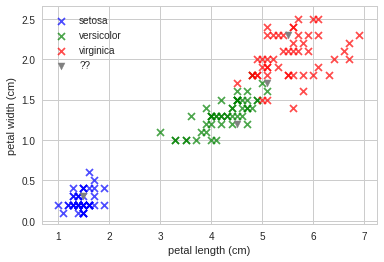

In [0]:
# sklearn is a large collection of machine learning algorithms
# here we’ll use it only for the built-in iris dataset
from sklearn import datasets

iris = datasets.load_iris()

print('Features: ', iris.feature_names)
print('Targets: ', iris.target_names)

petal_length = iris.data[:, iris.feature_names.index('petal length (cm)')]
petal_width = iris.data[:, iris.feature_names.index('petal width (cm)')]

for target in set(iris.target):
    example_ids = target == iris.target
    plt.scatter(petal_length[example_ids], petal_width[example_ids],
                label=iris.target_names[target], color='bgr'[target],
                marker='x', alpha=0.7)
unknown = np.array([
    [1.5, 0.3],
    [4.5, 1.2],
    [5.5, 2.3],
    [5.1, 1.7]
])
plt.scatter(unknown[:, 0], unknown[:, 1], marker='v',
            color='gray', s=50, label='??')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.grid(True)
plt.legend(loc='upper left');

Based on these two features, it is easy to distinguish iris setosa from the two remaining species. Yet iris versicolor and virginica remain mixed together. 

Looking closely at the plot, we might estimate the species of the selected unknown irises (gray triangles). For three of them the answer seems obvious – they belong in uniformly-colored areas covered by one species only. Yet unknown iris flower in (5.1, 1.7) is troublesome – it lays on the boundary of versicolor and virginica clusters. We can assume, that its species is the one of the closest one to it, coming from the training set (and so having a label). 

K-Nearest Neighbors method (http://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm) solves the classification problem, i.e. sets class labels (species in case of irises) of a previously unseen sample by choosing the most common class among the top k neighbors of the sample in question (for instance according to the Euclidean distance). Thus, the k-Nearest Neighbors algorithm works as follows. For each unlabeled sample x:
1. Find k nearest neighbors among the labeled samples.
2. Set the most common label among them as label of x.

#### Problem 2 [2p]

1.  **[1p]** Load the iris data (in Python it’s built-in into machine learning libraries, use sklearn.datasets.load_iris), the data is also available on-line at https://archive.ics.uci.edu/ml/datasets/Iris

2.  **[1p]** Irises are described with 4 attributes: petal and sepal widths and lengths. We often plot such data as matrices depicting relationships between pairs of attributes (the diagonal of which holds an ordinary histogram). Write code making a plot like the one below. Please pay attention to the details: make a proper legend and correctly label the axes.

<img src="https://github.com/janchorowski/nn_assignments/blob/nn18/assignment1/iris4x4.png?raw=1"/>

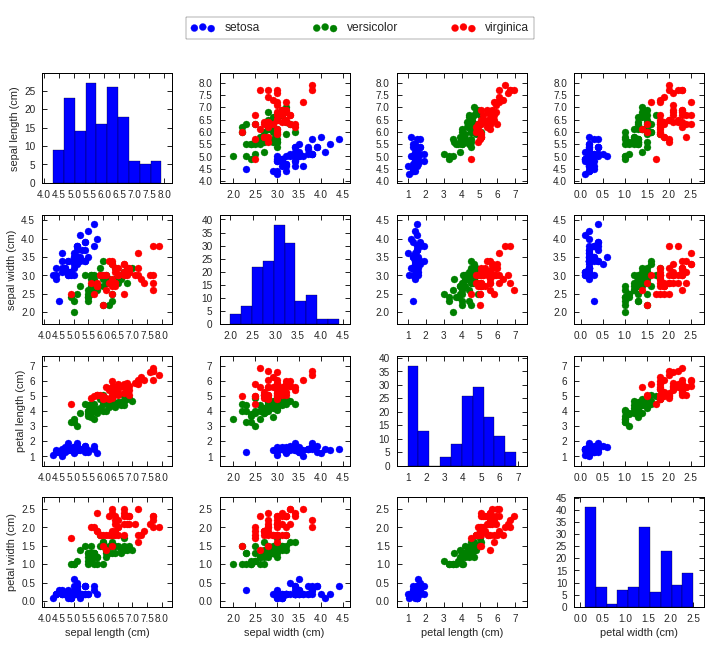

In [0]:
# sklearn is a large collection of machine learning algorithms
# here we’ll use it only for the built-in iris dataset
from sklearn import datasets
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

def set_style(ax):
    ax.margins(0.1)
    ax.grid(False)
    ax.spines['bottom'].set_color('black')
    ax.spines['top'].set_color('black')
    ax.spines['right'].set_color('black')
    ax.spines['left'].set_color('black')
    ax.tick_params(axis='both', which='both', direction='in', top=True, bottom=True, left=True, right=True)
    ax.xaxis.set_major_locator(ticker.MaxNLocator(steps=[1,5,10]))
    ax.yaxis.set_major_locator(ticker.MaxNLocator(steps=[1,5,10]))
    ax.tick_params(which='major', width=1.00)
    ax.tick_params(which='major', length=5)

iris = datasets.load_iris()

features = len(iris.feature_names)
fig, axes = plt.subplots(features, features, figsize=(10, 8))
plt.tight_layout()
handles = []

for i in range(features):
    for j in range(features):
        plt.subplot(features, features, i * features + j + 1)
        ax = plt.gca()
        set_style(ax)
        
        if i != j:
            for target in set(iris.target):
                example_ids = target == iris.target
                handles.append(plt.scatter(iris.data[:, j][example_ids], iris.data[:,i][example_ids],
                        label=iris.target_names[target], color='bgr'[target],
                        marker='o'))
        else:
            plt.hist(iris.data[:, j], color='b', ec='black')
        if j == 0:
            plt.ylabel(iris.feature_names[i])
        if i == features - 1:
            plt.xlabel(iris.feature_names[j])

# It seems legend's alpha is 0.5 for some reason            
fig.legend(handles=handles[:3], loc='upper center', edgecolor="black", frameon=True, scatterpoints=3, ncol=3, bbox_to_anchor=(0.25,1,0.5,0.1), framealpha=1, fancybox=False, fontsize=12, mode="expand")
plt.show()      

#### Problem 3 [2p]

Implement the k-Nearest Neighbors algorithm. Try to
take advantage of matrix calculus rather than using for loops.

**Tip:** What is computed by \begin{equation} \sqrt{(X - Y)^T (X - Y)} \end{equation} when both X and Y are vectors?

**Tip:** Try to use broadcasting (NumPy: http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) and built-ins sort, numpy.sort, numpy.argsort (sorting), scipy.stats.mode (choosing the most common element of the set).

In [0]:
import scipy

def KNN(data, unknown, labels, K):
    squaresData = np.sum(data**2, 1)
    squaresUnknown = np.sum(unknown**2, 1)
    
    scalars = -2 * np.matmul(unknown, data.T)
    scalars += squaresUnknown.reshape(-1,1)
    scalars += squaresData.reshape(1, data.shape[0])
    return scipy.stats.mode(labels[np.argsort(scalars, axis=1)[:,:K]], axis=1).mode
    
X = np.array([[1,0,2],[2,2,1],[0,1,0],[3,2,1]])   
Y = np.array([[1,1,1],[2,3,4]])
squaresX = np.sum(X**2, 1)
squaresY = np.sum(Y**2, 1)
scalarsXY = -2 * np.matmul(Y, X.T)
scalarsXY += squaresY.reshape(-1,1)
scalarsXY += squaresX.reshape(1, X.shape[0])

labels = np.array([0,1,2,1])
labels[np.argsort(scalarsXY, axis=1)[:,:2]]
scipy.stats.mode(labels[np.argsort(scalarsXY, axis=1)[:,:2]], axis=1).mode

KNN(X,Y,labels,2)
    

array([[0],
       [1]])

#### Problem 4 [2p]
Consider the following experiment:
1. We scramble the data and split it into two parts - training set (66.6% of all samples) and test set (33.4%).
2. Based on the training set, we use the k-NN algorithm to predict the labels on the test set.
3. We then check the number of errors and write it down.

Do this 500 times for k ∈ {1, 3, 5, ..., 19}. Plot a function of the average number of errors
as the function of k. It should be similar to the one below.

<img src="https://github.com/janchorowski/nn_assignments/blob/nn18/assignment1/knn.png?raw=1"/>

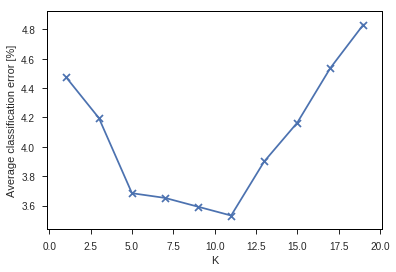

In [0]:
iris = datasets.load_iris()
N = iris.data.shape[0]
K = np.arange(1,21,2)
iterations = 500

average_errors = np.zeros(K.size)

for j in range(K.size):
    for i in range(iterations):
        indices = np.random.permutation(N)
        test = iris.data[indices[:N // 3], :]
        training = iris.data[indices[N // 3 :], :]
        training_labels = iris.target[indices[N // 3 :]]
        test_labels = iris.target[indices[:N // 3]]
        predictions = KNN(training, test, training_labels, K[j]).reshape(1,-1)
        average_errors[j] += np.sum(predictions != test_labels)

average_errors /= iterations
average_errors /= N // 3

ax = plt.gca()
ax.grid(False)
ax.spines['bottom'].set_color('black')
ax.spines['top'].set_color('black')
ax.spines['right'].set_color('black')
ax.spines['left'].set_color('black')
ax.tick_params(which='major', width=1.00)
ax.tick_params(which='major', length=5)
plt.plot(K, 100 * average_errors)
plt.scatter(K, 100 * average_errors, marker='x')
plt.xlabel("K")
plt.ylabel("Average classification error [%]")
plt.show()

#### Problem 5 [2p] 

Apply the K-Nearest Neighbors (K-NN) algorithm to the MNIST and CIFAR10 datasets. 

The MNIST (http://yann.lecun.com/exdb/mnist/) dataset consists of normalized (centered and stretched) scans of hand-written digits. Specifically, each element of the dataset is a 28 × 28 grayscale image, thus having 764 8-bit pixels. 

The CIFAR10 (http://www.cs.toronto.edu/~kriz/cifar.html) dataset consists of small, 32 by 32 pixels, RGB images belonging to 10 categories.

1. **[1p]** Download and load the MNIST and CIFAR10 datasets. For both datasets, display a few objects from each of the classes, paying attention to aesthetics and clarity of your presentation. **Note:** You already downloaded the datasets in "Setup" section. Please use the code below to get started.

2. **[2p]** Apply a k-NN classifier to the MNIST and CIFAR10 datasets. First, divide the training set into two parts, which we will call training and validation. On MNIST use the first 50000 samples for training and the last 10000 for validation. On CIFAR10, use 40000 to train and 10000 for validation. Then find the optimal number of neighbors by assessing the accuracy on the validation set. You do not need to repeat this experiment multiple times. Finally, compute the accuracy on the test set obtained with the best previously chosen number of neighbors. On MNIST you should get about 3% errors, while on CIFAR10 you should get about 70% errors. Why CIFAR10 is harder than MNIST? Pick a few mislabeled samples from the test dataset and plot them along with the correct ones. **Note:**
  * MNIST and CIFAR10 are much larger than the Iris dataset. A good implementation may need a few minutes depending on your runtime type. Please optimize your algorithm:
  * Compute the distances only once, then test for different values of k.
  * Use vectorized expressions to compute the distance. It is possible to compute all distances between the training and testing points in one expression. Hint: think about the vectorized expression \begin{equation}(X - Y)^T (X - Y)\end{equation}.
  * You can use single precision numbers in computation.
  * If your code is taking a long time to execute, please save its results before the lab session.

**Note:** in NumPy, matrices have its own data type (dtype), which is retained during
calculations. Please pay attention to it. I particular, do not subtract values of data types not
having the sign bit, do not divide integers, etc. Results of such operations will not be
automatically casted to types having the required precision.

In [0]:
with np.load('mnist.npz') as data:
    mnist_full_train_data_uint8 = data['train_data']
    mnist_full_train_labels_int64 = data['train_labels']
    mnist_test_data_uint8 = data['test_data']
    mnist_test_labels_int64 = data['test_labels']
        
# Split train data into train and validation sets
mnist_train_data_uint8 = mnist_full_train_data_uint8[:50000]
mnist_train_labels_int64 = mnist_full_train_labels_int64[:50000]
mnist_valid_data_uint8 = mnist_full_train_data_uint8[50000:]
mnist_valid_labels_int64 = mnist_full_train_labels_int64[50000:]

(20, 1, 28, 28)


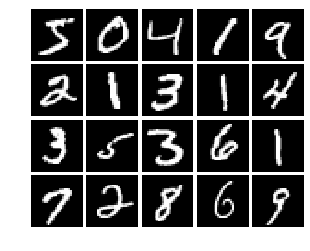

In [0]:
plot_mat(mnist_train_data_uint8[:20, None], cmap='gray')

In [0]:
with np.load('cifar.npz') as data:
    cifar_full_train_data_uint8 = data['train_data']
    cifar_full_train_labels_int64 = data['train_labels']
    cifar_test_data_uint8 = data['test_data']
    cifar_test_labels_int64 = data['test_labels']

# Split train data into train and validation sets
cifar_train_data_uint8 = cifar_full_train_data_uint8[:40000]
cifar_train_labels_int64 = cifar_full_train_labels_int64[:40000]
cifar_valid_data_uint8 = cifar_full_train_data_uint8[40000:]
cifar_valid_labels_int64 = cifar_full_train_labels_int64[40000:]

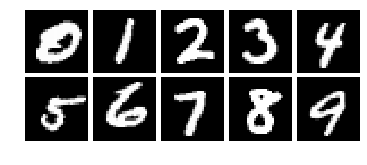

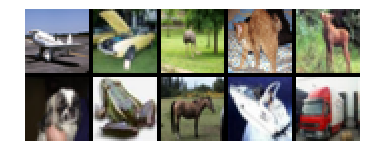

In [0]:
#
# TODO: plot an example of each class on MNIST and on CIFAR-10
#
class_examples = {mnist_test_labels_int64[i]:mnist_test_data_uint8[i,:,:] for i in range(mnist_test_data_uint8.shape[0])}
all_examples = np.array([class_examples[label] for label in class_examples])
plot_mat(all_examples[:, None], cmap='gray')
plt.show()

class_examples = {cifar_test_labels_int64[i]:cifar_test_data_uint8[i,:,:,:] for i in range(cifar_test_data_uint8.shape[0])}
all_examples = np.array([class_examples[label] for label in class_examples])
plot_mat(np.moveaxis(all_examples, -1, 1), cmap='rainbow')
plt.show()


In [0]:
from scipy.stats import mode


def KNN(train_X, train_Y, test_X, test_Y, ks, batch_size=200, return_predictions=False):
    """
    Compute error rate for various 
    """
    errs = np.zeros((len(ks),))
    return_predictions = return_predictions and len(ks) == 1
    total_predictions = np.array([])
    
    start = time.time()
    train_X = train_X.reshape(train_X.shape[0], -1).astype(np.int32)
    train_X_square_lengths = np.sum(train_X**2, axis=1, keepdims=True)
    test_X = test_X.reshape(test_X.shape[0], -1).astype(np.int32)
    
    for i in xrange(0, test_Y.shape[0], batch_size):
        batch_X = test_X[i:i + batch_size].T
        batch_Y = test_Y[i:i + batch_size]
        print("Examples %d:%d Computing distances... " %
              (i, i + batch_size), end='')

        #
        # TODO: fill in an efficient distance matrix computation
        #        
        dists = -2 * np.matmul(train_X, batch_X) + np.sum(batch_X**2, axis=0, keepdims=True) + train_X_square_lengths

        print("Sorting... ", end='')
        closest = np.argsort(dists, 0)

        print("Computing errors...")
        targets = train_Y[closest]

        for ki, k in enumerate(ks):
            predictions, unused_counts = mode(targets[:k, :], axis=0)
            predictions = predictions.ravel()
            #
            # TODO: fill in error count computation
            #
            errs[ki] += np.sum(predictions != batch_Y)
            
            if return_predictions:
                total_predictions = np.append(total_predictions, predictions)

    errs /= test_Y.shape
    end = time.time()
    print("Elapsed time:", end-start)
    
    if return_predictions:
        return np.vstack((ks, errs)), total_predictions
    return np.vstack((ks, errs))

Examples 0:200 Computing distances... Sorting... Computing errors...
Examples 200:400 Computing distances... Sorting... Computing errors...
Examples 400:600 Computing distances... Sorting... Computing errors...
Examples 600:800 Computing distances... Sorting... Computing errors...
Examples 800:1000 Computing distances... Sorting... Computing errors...
Examples 1000:1200 Computing distances... Sorting... Computing errors...
Examples 1200:1400 Computing distances... Sorting... Computing errors...
Examples 1400:1600 Computing distances... Sorting... Computing errors...
Examples 1600:1800 Computing distances... Sorting... Computing errors...
Examples 1800:2000 Computing distances... Sorting... Computing errors...
Examples 2000:2200 Computing distances... Sorting... Computing errors...
Examples 2200:2400 Computing distances... Sorting... Computing errors...
Examples 2400:2600 Computing distances... Sorting... Computing errors...
Examples 2600:2800 Computing distances... Sorting... Computing

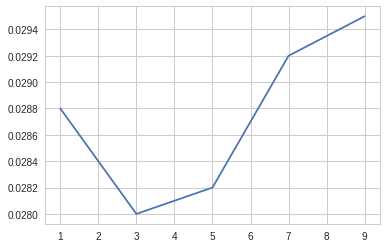

In [0]:
# Now find the best k on the validation set

mnist_validation_errs = KNN(
    mnist_train_data_uint8, mnist_train_labels_int64,
    mnist_valid_data_uint8, mnist_valid_labels_int64,
    [1, 3, 5, 7, 9])

plt.plot(mnist_validation_errs[0, :], mnist_validation_errs[1, :])

In [0]:
# Now use the best k to compute the test error

print(mnist_validation_errs)
best_K = int(mnist_validation_errs[0, np.argmin(mnist_validation_errs[1, :])])
print(best_K)

mnist_test_errs, mnist_predictions = KNN(mnist_full_train_data_uint8, 
                      mnist_full_train_labels_int64,
                      mnist_test_data_uint8, 
                      mnist_test_labels_int64, [best_K], return_predictions=True)
print("When k=%d the test error rate is %.1f%%" %
      (mnist_test_errs[0, 0], mnist_test_errs[1, 0] * 100.0))

[[1.     3.     5.     7.     9.    ]
 [0.0288 0.028  0.0282 0.0292 0.0295]]
3
Examples 0:200 Computing distances... Sorting... Computing errors...
Examples 200:400 Computing distances... Sorting... Computing errors...
Examples 400:600 Computing distances... Sorting... Computing errors...
Examples 600:800 Computing distances... Sorting... Computing errors...
Examples 800:1000 Computing distances... Sorting... Computing errors...
Examples 1000:1200 Computing distances... Sorting... Computing errors...
Examples 1200:1400 Computing distances... Sorting... Computing errors...
Examples 1400:1600 Computing distances... Sorting... Computing errors...
Examples 1600:1800 Computing distances... Sorting... Computing errors...
Examples 1800:2000 Computing distances... Sorting... Computing errors...
Examples 2000:2200 Computing distances... Sorting... Computing errors...
Examples 2200:2400 Computing distances... Sorting... Computing errors...
Examples 2400:2600 Computing distances... Sorting... Com

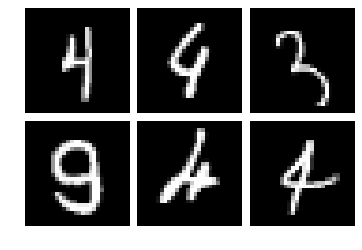

Predictions:
 [9. 9. 5. 8. 6. 1.]
Correct labels:
 [4 4 3 9 4 4]


In [0]:
correct = np.argwhere(mnist_predictions == mnist_test_labels_int64)
incorrect = np.argwhere(mnist_predictions != mnist_test_labels_int64)

sample_size = 6
plot_mat(mnist_test_data_uint8[incorrect[:sample_size],:,:], cmap='gray')
plt.show()
print("Predictions:\n", mnist_predictions[incorrect[:sample_size]].flatten())
print("Correct labels:\n", mnist_test_labels_int64[incorrect[:sample_size]].flatten())


Examples 0:200 Computing distances... Sorting... Computing errors...
Examples 200:400 Computing distances... Sorting... Computing errors...
Examples 400:600 Computing distances... Sorting... Computing errors...
Examples 600:800 Computing distances... Sorting... Computing errors...
Examples 800:1000 Computing distances... Sorting... Computing errors...
Examples 1000:1200 Computing distances... Sorting... Computing errors...
Examples 1200:1400 Computing distances... Sorting... Computing errors...
Examples 1400:1600 Computing distances... Sorting... Computing errors...
Examples 1600:1800 Computing distances... Sorting... Computing errors...
Examples 1800:2000 Computing distances... Sorting... Computing errors...
Examples 2000:2200 Computing distances... Sorting... Computing errors...
Examples 2200:2400 Computing distances... Sorting... Computing errors...
Examples 2400:2600 Computing distances... Sorting... Computing errors...
Examples 2600:2800 Computing distances... Sorting... Computing

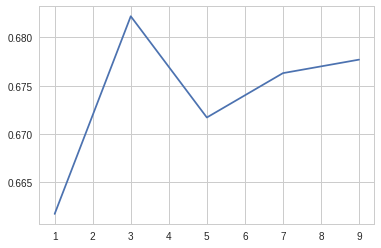

In [0]:
#
# Now repeat the k-NN training for CIFAR10
#

# Now find the best k on the validation set

cifar_validation_errs = KNN(
    cifar_train_data_uint8, cifar_train_labels_int64,
    cifar_valid_data_uint8, cifar_valid_labels_int64,
    [1, 3, 5, 7, 9])

plt.plot(cifar_validation_errs[0, :], cifar_validation_errs[1, :])

In [0]:
# Now use the best k to compute the test error

print(cifar_validation_errs)
best_K = int(cifar_validation_errs[0, np.argmin(cifar_validation_errs[1, :])])
print(best_K)

cifar_test_errs, cifar_predictions = KNN(cifar_full_train_data_uint8, 
                      cifar_full_train_labels_int64,
                      cifar_test_data_uint8, 
                      cifar_test_labels_int64, [best_K], return_predictions=True)
print("When k=%d the test error rate is %.1f%%" %
      (cifar_test_errs[0, 0], cifar_test_errs[1, 0] * 100.0))

[[1.     3.     5.     7.     9.    ]
 [0.6617 0.6822 0.6717 0.6763 0.6777]]
1
Examples 0:200 Computing distances... Sorting... Computing errors...
Examples 200:400 Computing distances... Sorting... Computing errors...
Examples 400:600 Computing distances... Sorting... Computing errors...
Examples 600:800 Computing distances... Sorting... Computing errors...
Examples 800:1000 Computing distances... Sorting... Computing errors...
Examples 1000:1200 Computing distances... Sorting... Computing errors...
Examples 1200:1400 Computing distances... Sorting... Computing errors...
Examples 1400:1600 Computing distances... Sorting... Computing errors...
Examples 1600:1800 Computing distances... Sorting... Computing errors...
Examples 1800:2000 Computing distances... Sorting... Computing errors...
Examples 2000:2200 Computing distances... Sorting... Computing errors...
Examples 2200:2400 Computing distances... Sorting... Computing errors...
Examples 2400:2600 Computing distances... Sorting... Com

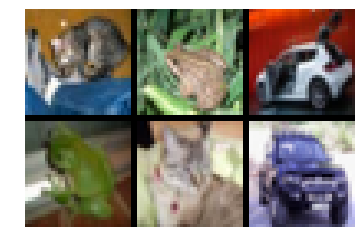

Predictions:
 [4. 4. 4. 2. 4. 8.]
Correct labels:
 [3 6 1 6 3 1]


In [0]:
correct = np.argwhere(cifar_predictions == cifar_test_labels_int64)
incorrect = np.argwhere(cifar_predictions != cifar_test_labels_int64)

sample_size = 6
plot_mat(np.moveaxis(cifar_test_data_uint8[incorrect[:sample_size],:,:,:][:,0,:,:,:], -1, 1), cmap='rainbow')
plt.show()
print("Predictions:\n", cifar_predictions[incorrect[:sample_size]].flatten())
print("Correct labels:\n", cifar_test_labels_int64[incorrect[:sample_size]].flatten())

### Locality sensitive hashing

Problem 5 was about speeding up the inference using loops implicitly present in matrix multiplication instead of explicit loops in Python. In this problem, we will explore a strategy to truly reduce the total number of computations required to find nearest neighbors without sacrificing too much accuracy.

To speed up nearest neighbor search we will employ *Locality Sensitive Hashing (LSH)* functions. For a given distance metric, the locality sensitive hash should put items that are similar into the same bucket. Notice that this is essentially a design choice opposite to traditional cryptographic hash functions that should amplify the difference of similar inputs (typically we want that small perturbations of data result in large changes to the hash value).

One of the simplest implementations of LSH approximates the cosine distance. Let $x\in \mathbb{R}^N$ and $y\in \mathbb{R}^N$ be two vectors. Their cosine distance is defined as:

\begin{equation}
    d_\text{cos}(x,y) = \frac{x \cdot y}{\|x\| \|y\|} = \cos\left(\theta(x,y)\right),
\end{equation}
where $\theta(x,y)$ is the unsigned angle between $x$ and $y$.

We will construct a family $H$ of hash functions that are an LSH for angle distances (an approximation to cosine distance). Assume $p\in \mathbb{R}^N$ is a random vector (components are sampled from the normal distribution) of length 1. Then define the hash function $h(x) = \text{sgn}(x\cdot p)$, where $\text{sgn()}$ is the sign function. It can be proven that:

\begin{equation}
    p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}.
\end{equation}

The equation means that the probability of a hash collision grows as the the angle between two vectors gets smaller. Therefore, vectors that are close according to the cosine distance will be put with high probability into the same bin (we use the fact that for small $\theta$ we can approximate $\cos(\theta) = 1 - \theta/\pi$.

We will say that a family of randomly chosen hash functions $H$ is $(d_1, d_2, p_1, p_2)$-sensitive with respect to a distance metric $d$ if for any $x$ and $y$:
1. If $d(x,y) \leq d_1$ then $p_{h\in H}[h(x)=h(y)] \geq p_1$.
2. If $d(x,y) \geq d_2$ then $p_{h\in H}[h(x)=h(y)] \leq p_2$.

For example, our family of randomly chosen hyperplanes is $(d_1, d_2, (1-d_1)/\pi, (1-d_2)/\pi)$-sensitive.

Ideally, vectors should be placed into the same bin with a high probability if their distance is smaller than a threshold, and with a low probability if their distance is larger that the threshold. By combining hashing functions we can get closer to this ideal sensitivity.

Given a family of hash functions $H$ with sensitivity $(d_1, d_2, p_1, p_2)$ we can construct a new family $H'$ by combining $r$ functions from $H$:
1. AND: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\forall_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, (p_1)^r, (p_2)^r)$-sensitive.
2. OR: let $h=[h_1, h_2, \ldots, h_r] \in H'$ and $h(x)=h(y)$ if and only if $\exists_i h_i(x)=h_i(y)$. Then $H'$ is $(d_1, d_2, 1-(1-p_1)^r, 1-(1-p_2)^r)$-sensitive.

AND makes all probabilities shrink, but properly choosing $r$ we can make the lower probability approach 0 while the higher does not. Conversely, OR makes all probabilities grow, we can make the upper probability approach 1 while the lower does not.

#### Problem 6 [2-4p bonus] 

1. **[1bp]** **Note:** you can show sketches of proofs for this assignment.
    1. Show that angle between vectors is a metric (https://en.wikipedia.org/wiki/Metric_(mathematics)).
    
    2. Show that $p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}$ for $h$ computed using a randomly chosen hyperplane.

    3. Show the properties of either AND or OR boosting of LSH.

3. **[1-3bp]** Reimplement k-Nearest Neighbors for MNIST classification using the cosine distance instead of the Euclidean distance. Choose a sensible value of $k$. Use Locality Sensitive Hashing to achieve an error rate no greater than $150\%$ of the original error rate with at least a $90\%$ speedup (i.e., by considering on average at most 5000 training samples per query image). For a few settings plot the speedup-vs-accuracy relation.

  **Note:** points will be awarded based on ingenuity of your solution. Feel free to explore your own ideas!


#####Task 1

1. From linked wikipedia site: A metric on a set $X$ is a function $d : X \times X \to [0,\infty)$, where $[0,\infty)$ is the set of non-negative real numbers and for all $x,y,z \in X$, the following conditions are satisfied:
    1. $d(x,y) \geq 0$
    2. $d(x,y) = 0 \iff x = y$
    3. $d(x,y) = d(y,x)$
    4. $d(x,z)  \leq d(x,y) + d(y,z)$

  Angle between vectors is NOT a metric because of two reasons. First of all, the angle function is defined as $\theta : \mathbb{R}^N \times \mathbb{R}^N \to [0,\pi]$ and not $\theta : \mathbb{R}^N \times \mathbb{R}^N \to [0,\infty]$. Secondly, angle between vectors doesn't fulfil condition 2: $d(x,y) = 0 \iff x = y$ because $\forall_{\alpha \in \mathbb{R}}d(x,\alpha x) = 0 $.

  However, if we ignore the first reason and assume that we only work with vectors of length 1, then the 4 conditions can be proven:
   1. $d(x,y) \geq 0$ : Angles are obviously non-negative.
   2. $d(x,y) = 0 \iff x = y$ : Since we are restricted to vectors of length 1, this condition holds.
   3. $d(x,y) = d(y,x)$ : Symmetry obviously holds.
   4. $d(x,z)  \leq d(x,y) + d(y,z)$ : For vectors of length 1, angle between two vectors can be mapped to the euclidean distance between two vectors: $\sqrt{2-2\cos\theta(x,y)} = \sqrt{<x,x> + <y,y> - 2<x,y>} = \sqrt{<x-y,x-y>} =|x,y| $. Since we know triangle inequality holds for euclidean distance, it must also hold for angle between two vectors.

2.  Show that $p_{h\in H}[h(x)=h(y)] = 1 - \frac{\theta(x,y)}{\pi}$ for $h$ computed using a randomly chosen hyperplane.

    $h(x) = sgn(p \cdot x)$, where $p \in \mathbb{R}^N$ and $|p| = 1$. Function h divides $\mathbb{R}^N$ vector space into three subspaces:
     *   $\{x \in \mathbb{R}^N| h(x) = 1\}$
     *   $\{x \in \mathbb{R}^N| h(x) = -1\}$
     *   $V = \{x \in \mathbb{R}^N| h(x) = 0\} = \{x \in \mathbb{R}^N| x \bot p\} $

  The last one, $V$, is a hyperplane of dimensionality $N-1$ of vectors perpendicular to $p$. Let $x,y \in \mathbb{R}^N$, the two vectors define a subspace $W$ of $\mathbb{R}^N$ of dimensionality $2$. We have two options: either $W$ is a subspace of $V$ ($W < V$), or $W$ intersects with $V$ and $dim(V \cap W) = 1$ meaning that the intersection is a 1D line on 2D subspace $W$. Since for random vector $p$, probability of the first option is $0$, we consider only the latter.
  
![Figure 1](https://drive.google.com/uc?id=1Lx5KihKvNca17RfVB9O7f6RKA74V6p68)


  From above picture we can see that the probability of $V \cap W$ intersecting $W$ so that $x$ and $y$ are on the opposite sides of the hyperplane (i.e. $h(x) \neq h(y) \iff sgn(p \cdot x) \neq sgn(p \cdot y)$) is $\frac{2\theta(x,y)}{2\pi} = \frac{\theta(x,y)}{\pi}$. Hence, the probability that the two vectors are on the same side of the hyperplane,  $p_{h\in H}[h(x)=h(y)]$ is $1 - \frac{\theta(x,y)}{\pi}$.

3. Show the properties of either AND or OR boosting of LSH.
  Let's show properties of AND. We need to prove that $H'$ is $(d_1, d_2, (p_1)^r, (p_2)^r)$-sensitive for all $r \in \mathbb{Z}^+$. We will use induction over $r$ - the size of hash family:
  

*   Induction base ($r = 1$): By definition $H$ is $(d_1,d_2,p_1,p_2)$-sensitive.
*   Induction step: Knowing that AND properties hold for $r$, we will show that they also hold for $r+1$. We need to show the below two properties of $(d_1, d_2, (p_1)^{r+1}, (p_2)^{r+1})$-sensitivity hold.
  1. If $d(x,y) \leq d_1$ then $p_{h\in H'}[h(x)=h(y)] \geq p_1^{r+1}$.
  2. If $d(x,y) \geq d_2$ then $p_{h\in H'}[h(x)=h(y)] \leq p_2^{r+1}$.

    Let's prove the first property. From probability we know that if events $A$ and $B$ are independent, i.e. $A \cap B = \emptyset$, then $P(A \cap B) = P(A) \cdot P(B)$. We know that all $h \in H$ are independent, therefore if $p[[h_1,\ldots,h_r](x) = [h_1,\ldots,h_r](y)] \geq p_1^r$ and $p[h_{r+1}(x) = h_{r+1}(y)] \geq p_1$, then $p[[h_1,\ldots,h_{r+1}](x) = [h_1,\ldots,h_{r+1}](y)] = p[[h_1,\ldots,h_r](x) = [h_1,\ldots,h_r](y) \wedge h_{r+1}(x) = h_{r+1}(y)] = p[[h_1,\ldots,h_r](x) = [h_1,\ldots,h_r](y)] \cdot p[h_{r+1}(x) = h_{r+1}(y)] \geq p_1^r \cdot p_1 = p_1^{r+1}$

  We can show the other property of sensitivity in the same way.



#####Task 2

In [0]:
from scipy.stats import mode

# Computes hashes using R randomly generated hyperplanes, generates them if not provided
def compute_hashes(train_X, test_X, R, ks, P=None):
    D = D = train_X.shape[1]
    powers_of_two = 2 ** np.arange(R) 
    
    if P is None:
        print("Generating", R, "hyperplanes and splitting training set into", 2**R, "buckets")
        iteration = 1
        while True:
            if iteration % 25 == 0:
                print("Generating hyperplanes - iteration", iteration)
                
            # Generating R random vectors of dimension D for LSH
            P = np.random.normal(size=(R,D))
            P /= np.linalg.norm(P, axis = 1, keepdims=True)

            # Computing hashes - each vector gets assigned with an int representing bucket assignment
            train_H = np.sum(np.maximum(np.sign(np.matmul(train_X, P.T) / np.linalg.norm(train_X, axis = 1, keepdims=True)).astype(int), 0) * powers_of_two, axis=1)
            test_H = np.sum(np.maximum(np.sign(np.matmul(test_X, P.T) / np.linalg.norm(test_X, axis = 1, keepdims=True)).astype(int), 0) * powers_of_two, axis=1)

            # We don't want any of the buckets to have too few or too many training vectors
            max_bucket_size = 7000
            count_per_bucket = np.bincount(train_H)
            if np.all(np.logical_and(count_per_bucket >= np.max(ks), count_per_bucket <= max_bucket_size)):
                break
                
            iteration += 1
    else:
        # Computing hashes - each vector gets assigned with an int representing bucket assignment
        train_H = np.sum(np.maximum(np.sign(np.matmul(train_X, P.T) / np.linalg.norm(train_X, axis = 1, keepdims=True)).astype(int), 0) * powers_of_two, axis=1)
        test_H = np.sum(np.maximum(np.sign(np.matmul(test_X, P.T) / np.linalg.norm(test_X, axis = 1, keepdims=True)).astype(int), 0) * powers_of_two, axis=1)
        count_per_bucket = np.bincount(train_H)
        
    print("Training set bucket distribution:\n", np.vstack((np.arange(2**R), count_per_bucket)))
    return train_H, test_H, P

# R is the number of vectors we want to use for hashing (Number of hyperplanes spliting vector space)
def KNN_LSH(train_X, train_Y, test_X, test_Y, ks, R, P=None):
    """
    Compute error rate for various 
    """
    
    train_X = train_X.reshape(train_X.shape[0], -1).astype(np.int32)
    test_X = test_X.reshape(test_X.shape[0], -1).astype(np.int32)
    train_H, test_H, P = compute_hashes(train_X, test_X, R, ks, P)    
    
    # Populating buckets
    train_id_dict = [[] for i in range(2**R)]
    train_data_dict = [[] for i in range(2**R)]
    test_id_dict = [[] for i in range(2**R)]
    test_data_dict = [[] for i in range(2**R)]
    
    for i in range(len(train_H)):
        h = train_H[i]
        train_id_dict[h].append(i)
        train_data_dict[h].append(train_X[i])
        
    for i in range(len(test_H)):
        h = test_H[i]
        test_id_dict[h].append(i)
        test_data_dict[h].append(test_X[i])
        
    for i in range(2**R):
        train_data_dict[i] = np.array(train_data_dict[i])
        test_data_dict[i] = np.array(test_data_dict[i])
        
    total_test_skipped = 0
    errs = np.zeros((len(ks),))
    for i in range(2**R):
        batch_size = len(test_id_dict[i])
        
        if batch_size == 0 or len(train_id_dict[i]) == 0:
            total_test_skipped += batch_size
            print("Hash %d, count %d - Skipping... " % (i, batch_size))
            continue
        
        batch_X = test_data_dict[i].T
        batch_Y = test_Y[test_id_dict[i]]

        
        print("Hash %d, count %d - Computing distances... " % (i, batch_size), end='')

        #
        # TODO: fill in an efficient distance matrix computation
        #
        dists = (np.matmul(train_data_dict[i], batch_X) / np.linalg.norm(batch_X, axis=0, keepdims=True)) / np.linalg.norm(train_data_dict[i], axis=1, keepdims=True)

        print("Sorting... ", end='')
        closest = np.argsort(-dists, 0)

        print("Computing errors...")
        targets = train_Y[np.array(train_id_dict[i])[closest]]

        for ki, k in enumerate(ks):
            predictions, unused_counts = mode(targets[:k, :], axis=0)
            predictions = predictions.ravel()
            #
            # TODO: fill in error count computation
            #
            errs[ki] += np.sum(predictions != batch_Y)

    errs /= test_Y.shape[0] - total_test_skipped
    return np.vstack((ks, errs)), P

Generating 4 hyperplanes and splitting training set into 16 buckets
Generating hyperplanes - iteration 25
Training set bucket distribution:
 [[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15]
 [ 378  383  366  442 1602 3868 1356 3725 2891 2477 4241 3177 6813 6009
  5855 6417]]
Hash 0, count 92 - Computing distances... Sorting... Computing errors...
Hash 1, count 84 - Computing distances... Sorting... Computing errors...
Hash 2, count 75 - Computing distances... Sorting... Computing errors...
Hash 3, count 103 - Computing distances... Sorting... Computing errors...
Hash 4, count 337 - Computing distances... Sorting... Computing errors...
Hash 5, count 746 - Computing distances... Sorting... Computing errors...
Hash 6, count 269 - Computing distances... Sorting... Computing errors...
Hash 7, count 737 - Computing distances... Sorting... Computing errors...
Hash 8, count 541 - Computing distances... Sorting... Computing errors...
Hash 9, count 478 - Compu

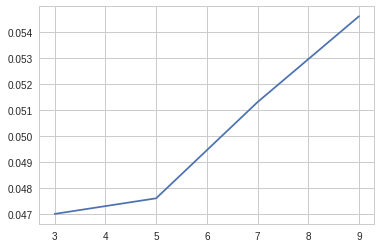

In [0]:
R = 4

start = time.time()
mnist_validation_errs, hyperplanes = KNN_LSH(
    mnist_train_data_uint8, mnist_train_labels_int64,
    mnist_valid_data_uint8, mnist_valid_labels_int64,
    [3, 5, 7, 9], R)

end = time.time()
print("Elapsed time:", end-start)

plt.plot(mnist_validation_errs[0, :], mnist_validation_errs[1, :])

In [0]:
# Now use the best k to compute the test error

print(mnist_validation_errs)
best_K = int(mnist_validation_errs[0, np.argmin(mnist_validation_errs[1, :])])
print(best_K)

start = time.time()
mnist_test_errs, _ = KNN_LSH(mnist_full_train_data_uint8, 
                      mnist_full_train_labels_int64,
                      mnist_test_data_uint8, 
                      mnist_test_labels_int64, [best_K], R, P=hyperplanes)
end = time.time()
print("When k=%d the test error rate is %.1f%%" %
      (mnist_test_errs[0, 0], mnist_test_errs[1, 0] * 100.0))
print("Elapsed time:", end-start)

[[3.     5.     7.     9.    ]
 [0.047  0.0476 0.0513 0.0546]]
3
Training set bucket distribution:
 [[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15]
 [ 470  467  441  545 1939 4614 1625 4462 3432 2955 4994 3805 8126 7228
  7090 7807]]
Hash 0, count 67 - Computing distances... Sorting... Computing errors...
Hash 1, count 90 - Computing distances... Sorting... Computing errors...
Hash 2, count 74 - Computing distances... Sorting... Computing errors...
Hash 3, count 90 - Computing distances... Sorting... Computing errors...
Hash 4, count 321 - Computing distances... Sorting... Computing errors...
Hash 5, count 798 - Computing distances... Sorting... Computing errors...
Hash 6, count 257 - Computing distances... Sorting... Computing errors...
Hash 7, count 770 - Computing distances... Sorting... Computing errors...
Hash 8, count 559 - Computing distances... Sorting... Computing errors...
Hash 9, count 500 - Computing distances... Sorting... Computing err

Generating 5 hyperplanes - iteration 250
Training set bucket distribution:
 [[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31]
 [3695 3327 2269 6385  522  354  469  968 1129 2820  606 5165  311  541
   266 1537  604  909  458 2072   87   77   59  185  364 1161  235 2585
    75  159   67  539]]
Hash 0, count 928 - Computing distances... Sorting... Computing errors...
Hash 1, count 862 - Computing distances... Sorting... Computing errors...
Hash 2, count 569 - Computing distances... Sorting... Computing errors...
Hash 3, count 1586 - Computing distances... Sorting... Computing errors...
Hash 4, count 148 - Computing distances... Sorting... Computing errors...
Hash 5, count 89 - Computing distances... Sorting... Computing errors...
Hash 6, count 107 - Computing distances... Sorting... Computing errors...
Hash 7, count 244 - Computing distances... Sorting... Computing errors.

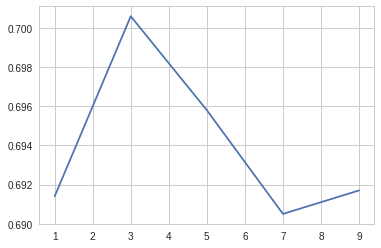

In [0]:
R = 5

start = time.time()
cifar_validation_errs, hyperplanes = KNN_LSH(
    cifar_train_data_uint8, cifar_train_labels_int64,
    cifar_valid_data_uint8, cifar_valid_labels_int64,
    [1, 3, 5, 7, 9], R)

end = time.time()
print("Elapsed time:", end-start)

plt.plot(cifar_validation_errs[0, :], cifar_validation_errs[1, :])

In [0]:
# Now use the best k to compute the test error

print(cifar_validation_errs)
best_K = int(cifar_validation_errs[0, np.argmin(cifar_validation_errs[1, :])])
print(best_K)

start = time.time()
cifar_test_errs, _ = KNN_LSH(cifar_full_train_data_uint8, 
                      cifar_full_train_labels_int64,
                      cifar_test_data_uint8, 
                      cifar_test_labels_int64, [best_K], R, P=hyperplanes)
end = time.time()
print("When k=%d the test error rate is %.1f%%" %
      (cifar_test_errs[0, 0], cifar_test_errs[1, 0] * 100.0))
print("Elapsed time:", end-start)

[[1.     3.     5.     7.     9.    ]
 [0.6914 0.7006 0.6958 0.6905 0.6917]]
7
Training set bucket distribution:
 [[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31]
 [4623 4189 2838 7971  670  443  576 1212 1389 3493  746 6483  395  679
   324 1979  756 1122  577 2576  106   93   71  223  443 1445  292 3212
    96  203   88  687]]
Hash 0, count 870 - Computing distances... Sorting... Computing errors...
Hash 1, count 799 - Computing distances... Sorting... Computing errors...
Hash 2, count 603 - Computing distances... Sorting... Computing errors...
Hash 3, count 1631 - Computing distances... Sorting... Computing errors...
Hash 4, count 140 - Computing distances... Sorting... Computing errors...
Hash 5, count 79 - Computing distances... Sorting... Computing errors...
Hash 6, count 109 - Computing distances... Sorting... Computing errors...
Hash 7, count 249 - Computing dis